# Disclaimer & Copyright

Copyright 2024 Forusone : shins777@gmail.com

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

# Gemini - Building marketing strategy using Gemini multimodality
* This notebook explains how to use Gemini mutimodality
* Refer to the link for more information about the Gemini
 * https://cloud.google.com/vertex-ai/generative-ai/docs/learn/overview
 * https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/overview
 * https://cloud.google.com/vertex-ai/generative-ai/docs/start/quickstarts/quickstart-multimodal

# Configuration
## Install python packages
* Vertex AI SDK for Python
  * https://cloud.google.com/python/docs/reference/aiplatform/latest

In [ ]:
%pip install --upgrade --quiet google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 10.9 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, Markdown

## Authentication to access to the GCP & Google drive

* Use OAuth to access the GCP environment.
 * Refer to the authentication methods in GCP : https://cloud.google.com/docs/authentication?hl=ko

In [ ]:
#  For only colab to authenticate to get an access to the GCP.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

* Mount to the google drive to access the .ipynb files in the repository.



In [ ]:
# To access contents in Google drive

if "google.colab" in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


# Execute the example
## Set the environment on GCP Project
* Configure project information
  * Model name : LLM model name : https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models
  * Project Id : prodect id in GCP
  * Region : region name in GCP

In [ ]:
MODEL_NAME="gemini-1.5-flash"
PROJECT_ID="ai-hangsik"
REGION="asia-northeast3"

### Vertex AI initialization
Configure Vertex AI and access to the foundation model.
* Vertex AI initialization : aiplatform.init(..)
  * https://cloud.google.com/python/docs/reference/aiplatform/latest#initialization

In [ ]:
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Part
import vertexai.preview.generative_models as generative_models

# Initalizate the current vertex AI execution environment.
vertexai.init(project=PROJECT_ID, location=REGION)

# Access to the generative model.
model = GenerativeModel(MODEL_NAME)

### Encoding function for multimodality

In [ ]:
import base64

def get_encoded_content(location_type, location, mime_type ):
  """
  Get the encoded content object.

  location_type :
    The type of the location. ( local or GCS )
  location :
    The file location of the content.
  mime_type :
    The mime type of the content.

  Returns:
    The encoded content object.

  """

  content_obj = None

  if location_type == "local":
    with open(location, 'rb') as f:
      raw_obj = base64.b64encode(f.read()).decode('utf-8')
      content_obj = Part.from_data(data=base64.b64decode(raw_obj), mime_type=mime_type)

  elif location_type == "GCS":
        content_obj = Part.from_uri(location, mime_type=mime_type)
  else:
    raise ValueError("Invalid location type.")

  return content_obj

### Function to get the response

In [ ]:
def generate(video, image, text, query:str):
    """
    Generate a response from the model.

    query :
      query to be sent to the model

    Returns:
      The generated response.

    """

    # Set model parameter : https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/send-multimodal-prompts#set_model_parameters
    generation_config = {
        "max_output_tokens": 8192,
        "temperature": 1,
        "top_p": 0.95,
    }

    # Configure satey setting : https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/configure-safety-attributes
    # Refer to the link to remove : https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/configure-safety-attributes#how_to_remove_automated_response_blocking_for_select_safety_attributes
    safety_settings = {
        generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
        generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_MEDIUM_AND_ABOVE,
    }

    responses = model.generate_content(
        [video, image, text, query],
        generation_config=generation_config,
        safety_settings=safety_settings,
        stream=False,
    )

    return responses.text

## Multimodal context
### Video content

In [ ]:
# For only colab to display the video.
import moviepy.editor
location_type = "local"
mime_type = "video/mp4"
file_path = "/content/drive/MyDrive/projects/google_gen_ai_sample/contents/videos/airplane.mp4"
video_obj = get_encoded_content(location_type, file_path, mime_type )

moviepy.editor.ipython_display(file_path, maxduration = 130, height=500, width=600)

Output hidden; open in https://colab.research.google.com to view.

### Image content

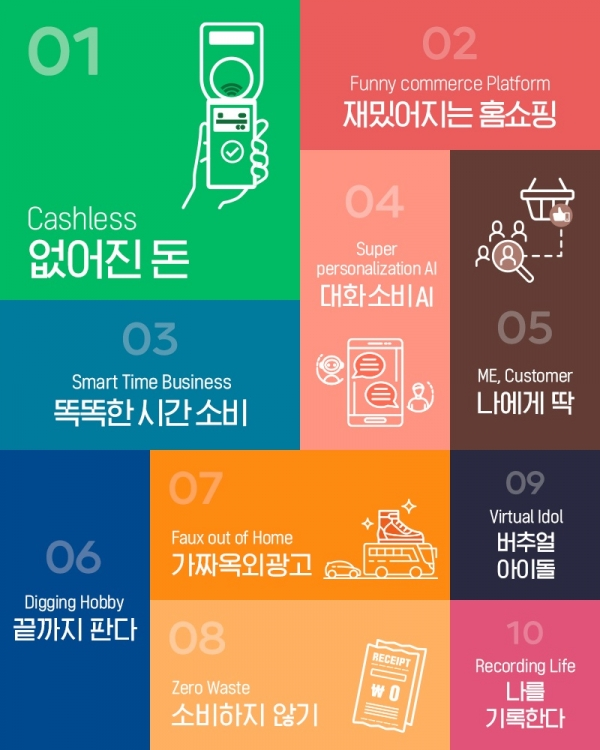

In [ ]:

# For only colab to display the video.
from IPython.display import Image

location_type = "local"
mime_type = "image/jpeg"
file_path = "/content/drive/MyDrive/projects/google_gen_ai_sample/contents/images/mz_article.jpeg"
image_obj = get_encoded_content(location_type, file_path, mime_type )

Image(file_path, width=400, height=500)

### Text content

In [ ]:
# text file reader
with open("/content/drive/MyDrive/projects/google_gen_ai_sample/contents/text/mz_marketing.txt", "r") as f:
    text = f.read()

display(Markdown(text))

최신 MZ 세대 마케팅 전략 : https://www.openads.co.kr/content/contentDetail?contsId=11361

커머스 기업이 MZ세대를 공략하는 것은 비즈니스의 성장과 발전에 있어서 매우 중요한 전략이죠. MZ 세대는 "밀레니얼(Millennials)"과 "Z 세대(Generation Z)"를 뜻하는 용어로 현재 대중을 이루고 있는 중요한 소비자 그룹이에요. 다양성과 유연성을 중요시하기 때문에 기성세대와는 다소 차이가 있어요. MZ 세대를 공략하기 위해서는 이들의 소비력과 관심사를 파악하고 효과적인 마케팅을 진행하는 것이 커머스에서 필수적 입니다! 

1. MZ 세대들의 새로운 소비 트렌드
우리가 흔히 알고 있던, ‘가성비’, ‘가심비’ 외에 새롭게 등장한 MZ 세대들의 소비 트렌드를 아시나요? 바로 미코노미인데요! 가격, 활용성 등 기타 다른 가치보다도 자신만의 기준에 따라 본인의 만족도를 최우선으로 하는 미코노미(Meconomy)가 요즘 MZ 세대들의 소비 트렌드라고 합니다.

미코노미, 그래서 뭔데?
미코노미는 ‘나(Me)’와 ‘경제(Economy)’를 합친 신조어에요. 내가 중심이 되어 나를 위한 소비에 돈을 아끼지 않는 트렌드를 말하죠. 개인의 취향과 가치가 소비의 기준이라니, 본인을 개성을 과감없이 드러내고 그것을 공유하는 MZ 세대의 특징에 걸맞는 소비 트렌드라고 볼 수 있죠. 이러한 소비 성향이 명품 시장을 키우기도 하고, 맨즈케어 시장을 확장하며 심지어 메타버스 세계 속 가상세계 붐을 일으키기도 했어요.🪐

가장 최근에는 MZ세대의 이러한 성향이 ‘미닝아웃’ 트렌드로 이어지고 있어요. 미닝아웃은 사실 미코노미 트렌드 중 하나라고 볼 수 있는데, ‘신념이 벽장 속에서 나온다’라는 뜻으로 Meaning+Coming out의 합성어에요. 즉, 개인의 취향과 정치/사회적 신념을 소비를 통해 적극적으로 표현하는 것을 말하죠. 논란이 발생한 기업은 불매운동을 통해 자신의 의지를 드러내고, 친환경 제품 혹은 착하고 바른 기업들은 ‘돈쭐’냄으로써 그들의 제품을 구매하고 매출을 증대시키기도 하는 게 대표적인 사례에요.

지그재그의 <제가 알아서 살게요> 캠페인
최근 MZ 타겟팅에 성공한 광고사례 중 대표적인 광고는 패션플랫폼 지그재그의 <내가 알아서 살게요> 캠페인이에요.👢 과거 시니어 광고모델인 윤여정 배우님을 모델로 기용하여 “니들 맘대로 하세요” 캠페인을 통한 파격적인 광고가 한차례 있었는데요, 그에 걸맞게 이번에는 “제가 알아서 살게요”라는 카피로 또 다른 시대흐름을 반영하는 카피가 나왔어요. “제가 알아서 살게요”는 알아서 살고(live), 알아서 사겠다(buy)는 중의적인 의미를 지낸 카피에요.✌🏻 지그재그의 브랜드 마케팅팀에 따르면 다양한 라이프 스타일을 갖고 있는 10대~30대 여성들을 타겟으로 스타일에는 답이 없고 어떤 스타일이든 존중한다'라는 가치를 확장하고자 했다고 해요.

이들이 이번 캠페인에 함께한 모델들도 크게 주목받았는데요, 그 원인은 모델 6명 모두 각기 다른 분야에 있는 사람들이지만 독보적인 캐릭터로 2030 여성들에게 아이코닉한 캐릭터라는 겁니다. 실제로 모델 채용 시 지그재그 측에서는 각자 뚜렷한 개성과 매력이 있으면서도 어떤 스타일이든 존중한다는 메시지를 가장 잘 표현할 모델들을 선정한 것이라고 해요. 👩‍👩‍👧 그만큼 각기 직업, 체형, 스타일이 달라 이들의 매력이 더 잘 표현됐다고 할 수 있죠.

광고는 모델들 뒤에서 그들을 평가하는 구설로 시작되는데요, 이 수근거림은 마지막에 웅성거림으로 처리되면서 모델의 얼굴을 줌인하고 그 때! “제가 알아서 살게요”라는 카피가 나와요. 😎 다양한 인생에 대해 존중없이 평가하고 참견하는 사람들에게 일침을 가한다는 점에서 인상 깊은 광고입니다.

이번 캠페인을 통해 브랜드 캠페인 시작 직후인 5월 중순 기준, 신규 가입자가 전주보다 43% 늘었고, 앱 설치도 26% 증가했다고 해요. 같은 기간 지그재그 첫 구매자 수도 51%나 늘었다고 해  ‘나 다움을 찾길 바란다’라는 브랜드 메시지가 명확하게 전달 된 결과이지 않을까 싶습니다. 👚

2. MZ 세대 공략을 위한 새로운 마케팅 전략 등장
특히나 MZ 세대는 디지털에 친숙하기에 기존의 마케팅 접근법과는 다른 특성들을 가지고 있어요. 이런 특성들을 바탕으로 온라인에서 기업의 브랜드 커뮤니케이션 역량을 강화하기 위한 다양한 노력들이 이어지고 있죠 더 나아가, 브랜드와의 상호 작용이 온라인에서 오프라인 분야까지 확장하며 다양한 전략들이 생겨나고 있어요. 우리 브랜드에 적절한 채널이 무엇인지 파악하고 MZ 세대의 특성을 적극적으로 활용하여 고객과 브랜드가 상호작용 해야 합니다.

소셜미디어를 적극 활용해보세요!
여러분 비즈니스에 가장 잘 맞는 온드미디어는 무엇인가요? SNS 플랫폼에 많은 시간을 보내는 것이 MZ 세대의 특성 중 하나인데요. 최근에는 짧은 영상을 통해 컨텐츠를 간결하고 빠르게 확인할 수 있는 숏폼 형태들이 새로운 트렌드로 자리를 잡았어요. 트렌드를 가득 담아 전달 드리는 만큼 이번 달 가장 핫한🔥스레드 소식도 간략하게 살펴볼까요?

스레드(Thread)란?
지난 7일, 메타에서 텍스트기반의 소셜 미디어 트위터의 대항마 스레드(Thread)를 출시했어요. 인스타그램과 손쉽게 연동을 할 수 있어서 폭발적으로 가입자가 증가했으며 무려 출시한 지 16시간만에 가입자가 3천만명 그리고 출시 5일 만에 이용자 1억명을 돌파하는 전례없는 기록을 세우기까지 했어요! 
하지만, 2주 연속 하락세에 이어 이용자가 약 70%로 줄어들었다고 합니다.😢 전문가들이 분석한 원인들 중 하나는 소통에 강점을 가지고 있지만, 다이렉트 메세지의 기능과 같은 주요 기능들이 빠졌기 때문이라는 견해가 있었어요.

기업의 소셜 미디어 활용 능력이 점차 발전하면서 새로운 소셜 미디어 마케팅 전략들도 등장했어요.

· 인플루언서 마케팅: MZ 세대에게 영향력을 지닌 인플루언서와의 협업을 통해 제품 혹은 브랜드를 소개하는 전략입니다. 인플루언서와 팔로워들 사이의 신뢰와 유대감을 활용하여 브랜드의 긍정적인 상호작용을 증진시킬 수 있어요. 또한 더 넓은 수요층을 대상으로 브랜드를 알릴 수 있어요.

· UGC(User Generated Contents) 활용: 소비자들이 브랜드와 제품을 직접 사용하고 경험한 내용을 제작하는 컨텐츠를 의미합니다. 용어는 생소할 수 있지만, #해시태그를 달고 경품 응모나 무료 음료수🧃 받아본 경험을 떠올려보세요! 블로그/인스타 체험단의 마케팅도 UGC를 활용한 대표적인 사례에요.

브랜드 놀이터🛝, 팝업 스토어

앞서 소개드린 사례들은 MZ 세대를 공략하기 위한 다양한 온라인 마케팅 사례라면, 최근에는 해당 영역이 오프라인까지 확대되어 브랜드의 새로운 컨셉이나 제품을 알리고 고객들을 끌어들이기 위해 팝업 스토어를 활용하는 사례가 늘고 있어요. 새롭고 재미있는 경험을 추구하는 MZ 세대를 겨냥하기에 가장 좋은 마케팅 활동이라고 생각해요! 팝업 스토어를 통해 사진을 찍거나 동영상을 촬영할 수 있는 장소를 제공하여 자연스럽게 UGC 활성화로 인한 온라인 홍보까지 이뤄낼 수 있는 일석이조🐰🐇의 전략이죠.

최근 팝업스토어에서 주목 받고 있는 컨셉은 레트로📺에요. 자신이 경험해보지 못한 과거 혹은 직접 경험해보지않았지만 마냥 즐거웠던 누군가의 추억을 통해 공감과 위로를 받으며 레트로의 개념 역시 새롭게 탄생해가고 있어요. 이런 레트로에도 종류가 있는거 알고 계셨나요?

· 레트로: Retrospect에서 유래한 단어로 회상, 회소, 추억을 의미해요. 쉽게 말해, 옛것을 그리워하고 따라하는 것을 뜻합니다. 빈티지한 옛것을 본떠 생산하는 것이 ‘레트로’라고 볼 수 있어요. ex) 더 퍼스트 슬램덩크🏀 영화, 필름 카메라🎞️

· 뉴트로: 뉴(New)+ 레트로(Retro)의 합성어에요. 레트로에 새로운 감성을 더해 재해석하는 것을 의미합니다. 성수동을 떠올리면 가장 와닿을 것 같아요. 구두 제조업 공장 혹은 자동차 정비소로 이용했던 낡은 건물의 외간과 그렇지 못한 세련된 내부로 이루어진 성수동 골목의 힙한 가게들이 대표적으로 뉴트로를 활용한 예시에요.

· Y2K: Year(연도) + 2(2000년) + Kilo(1,000)의 문제를 뜻하는 합성어로, 연도의 끝자리만 인식하는 컴퓨터 시스템의 오류로 2000년이 다가오면 1900년도와의 혼동이 있을거고, 2번째 밀레니엄을 맞이하면서 세계가 멸망할거라는 괴담이 도는 대혼란의 시기를 의미하는 용어에요. 그 혼란이 지나고 세기 말-세기 초의 파격적인 스타일이 쏟아 나왔던 시기였어요. 지금 재유행하는 크롭티, 로우라이즈, 벨벳 트레이닝 세트 등이 이 시기에 시작된 패션 아이템들이에요.

Article Source : https://www.openads.co.kr/content/contentDetail?contsId=11361


## Run example

In [ ]:

from time import perf_counter

t1_start = perf_counter()

prompt = """
You are an AI Agent who helps build a marketing strategy for marketers.
Follow the below steps to generate the marketing strategy.
Explain the strategy in Korean

1. Summarize and explain the video, image, and text first,
2. Build an advertising strategy for the perspective of the video, image, and text.
3. Consider how to measure the marketing performances by channel or media such as TV, print, and social media.

"""

outcome = generate(video_obj, image_obj, text, prompt)

t1_end  = perf_counter()
print(f"Time : {t1_end - t1_start} seconds\n\n")

display(Markdown(outcome))


Time : 17.481644450999994 seconds




## MZ세대를 사로잡는 마케팅 전략: 영상, 이미지, 텍스트 분석 및 전략 제시

**1. 영상, 이미지, 텍스트 분석**

영상은 비행기 창문에서 바라본 구름 위 풍경과 날개에 새겨진 "AVIANCA" 로고를 보여줍니다. 이미지는 MZ세대를 위한 10가지 마케팅 전략을 한국어로 설명하는 인포그래픽입니다. 텍스트는 MZ세대 마케팅 트렌드와 전략을 다룬 기사로, 미코노미, 미닝아웃, 지그재그의 "제가 알아서 살게요" 캠페인, 소셜 미디어 활용, 팝업 스토어 등을 소개합니다.

**2. 광고 전략**

이 영상, 이미지, 텍스트를 기반으로 MZ세대를 타겟으로 하는 광고 전략을 다음과 같이 제안합니다.

**핵심 키워드:** 개성, 자기표현, 가치소비, 경험, 공감

**광고 메시지:**

* "나만의 스타일, 나만의 가치, 나를 기록하는 삶." (영상, 이미지, 텍스트 공통)
* "세상이 정해놓은 틀을 벗어나, 당신의 이야기를 펼쳐보세요." (영상)
* "MZ세대가 주목하는 10가지 트렌드, 지금 바로 경험하세요." (이미지)
* "미코노미, 미닝아웃, 지그재그의 성공 전략, 당신의 브랜드에 적용해보세요." (텍스트)

**광고 채널:**

* **영상:** 유튜브, 인스타그램, 틱톡 등 숏폼 플랫폼에 릴스, 숏츠 형태로 제작하여 배포
* **이미지:** 인스타그램, 페이스북, 카카오톡 등 소셜 미디어 플랫폼에 게시
* **텍스트:** 블로그, 웹사이트, 뉴스레터 등을 통해 MZ세대가 자주 접하는 매체에 게재

**광고 형태:**

* **영상:** 비행기가 구름 위를 나는 영상을 배경으로 MZ세대가 좋아하는 음악과 함께 자유롭고 개성 넘치는 영상 제작 (예: MZ세대가 자신을 표현하는 모습, 트렌디한 제품 사용 모습 등)
* **이미지:** 10가지 트렌드를 시각적으로 강조하는 디자인과 함께, MZ세대의 감성을 자극하는 문구 추가
* **텍스트:** 핵심 키워드를 활용한 짧고 임팩트 있는 제목과, MZ세대가 흥미를 느낄 수 있는 콘텐츠 구성

**3. 마케팅 성과 측정**

각 채널별 마케팅 성과를 측정하기 위해 다음과 같은 지표를 활용합니다.

* **영상:** 조회수, 시청 시간, 좋아요, 댓글, 공유 수 등
* **이미지:** 게시글 노출 수, 클릭 수, 댓글, 좋아요, 공유 수 등
* **텍스트:** 페이지뷰, 방문자 수, 클릭률, 공유 수 등

**추가적으로:**

* 캠페인 해시태그를 활용하여 소셜 미디어에서의 브랜드 인지도 및 참여율 측정
* 팝업 스토어 방문객 수, 제품 구매율 등을 통해 오프라인 마케팅 효과 측정
* 설문조사, 인터뷰 등을 통해 MZ세대의 브랜드 인식 및 만족도 조사

**MZ세대를 위한 마케팅 전략 성공을 위한 추가 조언:**

* MZ세대의 언어와 문화를 이해하고, 그들과 소통할 수 있는 콘텐츠 제작
* 인플루언서 마케팅, UGC 활용 등 MZ세대에게 영향력 있는 채널 및 전략 활용
* 꾸준한 소통과 참여를 통해 브랜드에 대한 신뢰와 친밀감 형성
* 데이터 분석을 통해 효과적인 마케팅 전략 수정 및 개선

**마케팅 전략 요약 (한국어)**

MZ세대는 개성과 자기표현, 가치소비를 중시하는 세대입니다. 이들을 공략하기 위해서는 영상, 이미지, 텍스트 등 다양한 콘텐츠를 통해 그들의 언어와 문화에 맞춰 소통해야 합니다. 특히 숏폼 영상, 소셜 미디어 활용, 팝업 스토어 등 MZ세대가 자주 이용하는 채널과 전략을 활용해야 효과적인 마케팅 결과를 얻을 수 있습니다. 또한, 인플루언서 마케팅, UGC 활용 등을 통해 MZ세대와의 상호 작용을 강화하고, 지속적인 소통을 통해 브랜드에 대한 신뢰와 친밀감을 높여야 합니다. 마케팅 성과 측정을 통해 전략을 지속적으로 개선하여 MZ세대의 마음을 사로잡는 성공적인 마케팅을 진행하세요!
